# 1)Prediction of delivery time using sorting time

In [ ]:
#importing pandas library
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stat

In [51]:
#loading csv file into pandas dataframe
dset=pd.read_csv('delivery_time.csv')

In [52]:
#overview of first 5 values in the dataset
dset.shape
dset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [53]:
#checking for null values and datatypes
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [54]:
#renaming the column names
dset=dset.rename({'Delivery Time':'deliverytime','Sorting Time':'sortingtime'},axis=1)

In [55]:
#getting to know the values of correlation coeeficients
dset.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


<AxesSubplot:xlabel='sortingtime', ylabel='deliverytime'>

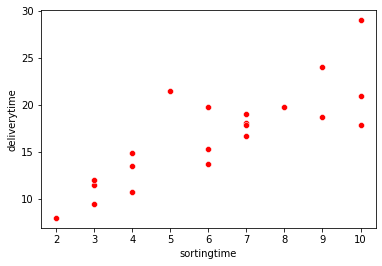

In [56]:
#scatter plot for correlation
sns.scatterplot(x='sortingtime',y='deliverytime',data=dset,color='red')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        21:54:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

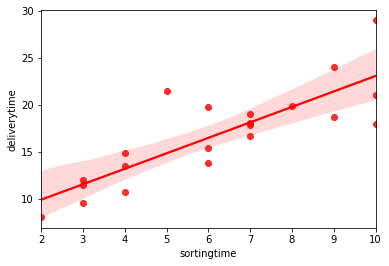

In [58]:
#importing statsmodels libary and using ols method and training the model 
#finally getting the model summary
import statsmodels.formula.api as smf
model1=smf.ols('deliverytime~sortingtime',data=dset).fit()
sns.regplot(x='sortingtime',y='deliverytime',data=dset,color='red')
model1.summary()

In [59]:
#as R-Squared value is low applying log transformation
dset_log=dset
dset_log['deliverytime']=np.log(dset['deliverytime'])

In [60]:
dset_log.head()

,deliverytime,sortingtime
0,3.044522,10
1,2.602690,4
2,2.983153,6
3,3.178054,9
4,3.367296,10


In [61]:
#getting to know the values of correlation coeeficients on log transformed dataset
dset_log.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.843177
sortingtime,0.843177,1.000000


<AxesSubplot:xlabel='sortingtime', ylabel='deliverytime'>

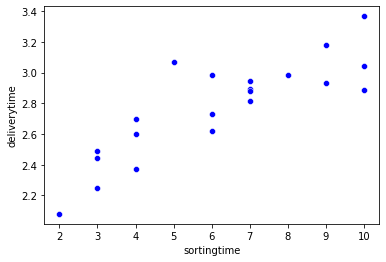

In [62]:
#scatter plot
sns.scatterplot(x='sortingtime',y='deliverytime',data=dset_log,color='blue')

In [63]:
#square transformation
dset_sq=dset
dset_sq['deliverytime']=dset.deliverytime**(1/2)

In [64]:
dset_sq.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.842231
sortingtime,0.842231,1.000000


In [65]:
#exponential transformation
dset_exp=dset
dset_exp['deliverytime']=dset.deliverytime**(1/1.2)

In [66]:
dset_exp.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.841954
sortingtime,0.841954,1.000000


In [67]:
#Boxcox transformation
dset_boxcox=dset
dset_boxcox['deliverytime'],parameters=stat.boxcox(dset['deliverytime'])

In [68]:
dset_boxcox.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.839249
sortingtime,0.839249,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     45.26
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.98e-06
Time:                        21:54:49   Log-Likelihood:                -3.9174
No. Observations:                  21   AIC:                             11.83
Df Residuals:                      19   BIC:                             13.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7805      0.180      4.340      0.000       0.404       1.157
sortingtime     0.1814      0.027      6.728      0.000       0.125       0.238
==============================================================================
Omnibus:                        2.327   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.248
Skew:                           0.591   Prob(JB):                        0.536
Kurtosis:                       3.164   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

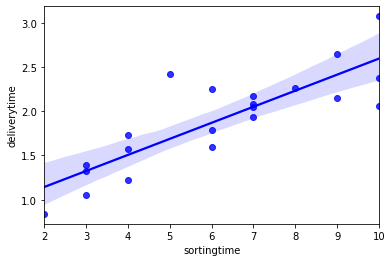

In [69]:
#as we have seen the correlation is greater in log tansformation we are using the log transformed dataset
#look at the improved R-squared value below
model2=smf.ols('deliverytime~sortingtime',data=dset_log).fit()
sns.regplot(x='sortingtime',y='deliverytime',data=dset_log,color='blue')
model2.summary()

In [70]:
#shaping values into dataframe for prediction
newdata=pd.Series([2,7])
datapred=pd.DataFrame(newdata,columns=['sortingtime'])
datapred

,sortingtime
0,2
1,7


In [71]:
#Prediction on new values of sorting time
model1.predict(datapred)

0     9.880774
1    18.125873
dtype: float64

# 2)Build a prediction model for Salary_hike

In [72]:
bset=pd.read_csv('Salary_Data.csv')

In [73]:
bset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [74]:
bset.shape

(30, 2)

In [75]:
bset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


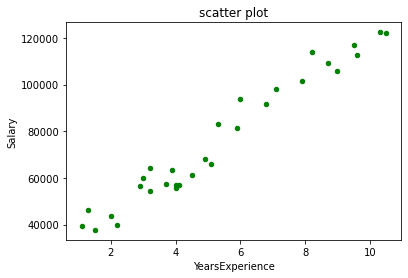

In [78]:
plt=bset.plot.scatter(x='YearsExperience',y='Salary',title='scatter plot',color='Green')

In [79]:
bset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        22:06:44   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

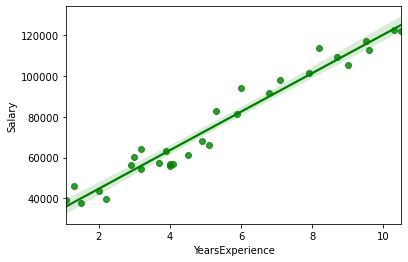

In [80]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=bset).fit()
import seaborn as sns
sns.regplot(x='YearsExperience',y='Salary',data=bset,color='Green')
model.summary()

In [86]:
ndata=pd.Series([5.6,11.9,14.0,23.0,56.5])
ndata_pred=pd.DataFrame(ndata,columns=['YearsExperience'])
ndata_pred

,YearsExperience
0,5.6
1,11.9
2,14.0
3,23.0
4,56.5


In [87]:
model.predict(ndata_pred)

0     78711.989199
1    138246.751824
2    158091.672699
3    243141.333592
4    559715.071361
dtype: float64

# Conclusion


We have done the simple linear regression for both the problem statements 1 and 2. After looking at the resuluts we conclude that the 2nd model perfomed well with a best r squared score compared to the 1st model.

                                                          K.SUMAN KUMAR